In [22]:
import tensorflow as tf

In [23]:
from tensorflow.examples.tutorials.mnist import input_data

In [24]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [25]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c2ceb4ba8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c2ceb4e48>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c2ceb4ef0>)

In [26]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [27]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [28]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [29]:
mnist.validation.images.shape

(5000, 784)

In [30]:
import numpy as np
from matplotlib import pyplot as plt

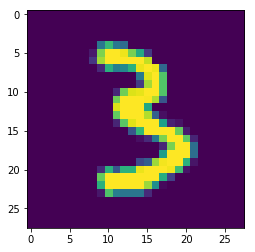

In [31]:
first_image = mnist.train.images[412]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [32]:
with tf.Session() as sess:
    print(tf.random_normal([784, 256]).eval())

[[ 0.27737778  1.9903717  -0.3673577  ...,  1.03369391 -0.64082879
  -0.49761856]
 [-0.33661583 -0.44995251  0.57330441 ..., -0.45720869  1.37859488
  -1.52848101]
 [-1.31242561 -0.03728846  0.51944399 ...,  0.12360641  0.0640543
  -0.36333963]
 ..., 
 [ 0.59617668  1.67344177 -1.55677068 ...,  0.87780756 -1.06859076
  -0.78537446]
 [ 0.94489622 -0.14393929 -0.14852545 ..., -0.90294963  1.29174137
   1.19068635]
 [-1.86703086 -1.80996883 -1.09966731 ...,  0.88350892 -0.92721862
   0.50529331]]


In [33]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [34]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_7:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_12:0' shape=(10,) dtype=float32_ref>]

In [35]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [36]:
x = tf.placeholder("float", [None, n_input])
y =tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [37]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

In [38]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [45]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [46]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

25293.5888176
5315.23647187
2712.12287982
1838.5750719
1445.4085486
1305.87004675
1111.03826703
944.198320175
811.903118697
734.364716449
693.887420736
637.789177042
533.368781224
453.776671396
394.457511591
360.047066105
338.558640063
290.97362693
289.484946223
220.941823438
208.768152281
192.970408337
200.511622493
144.955585311
141.870637628


In [47]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

9608